<a href="https://colab.research.google.com/github/pawangupta/MachineLearningExperiments/blob/main/PriceElasticity/Price%20Elasticity%20of%20Demand%20-02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%matplotlib inline

#from __future__ import print_function
from statsmodels.compat import lzip
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

import os

In [ ]:
'''
path=os.getcwd()
print(path)

read_path = "/Users/pawankumar.gupta/Google Drive/Tech/ML/Code/PriceElasticity/Data"

read_file = read_path + '/item.csv'

Gitbub : PriceElasticity/Data/item.csv
PriceElasticity/Data/item.csv
https://raw.githubusercontent.com/pawangupta/MachineLearningExperiments/main/PriceElasticity/Data/item.csv

'''


/Users/pawankumar.gupta/Google Drive/Tech/ML/Code/PriceElasticity/notebooks


In [3]:
url = 'https://raw.githubusercontent.com/pawangupta/MachineLearningExperiments/main/PriceElasticity/Data/item.csv'
item = pd.read_csv(url)



In [ ]:
#item = pd.read_csv(read_file)

In [5]:
item.head(10)

,Year,Quarter,Quantity,Price
0,1977,1,22.9976,142.1667
1,1977,2,22.6131,143.9333
2,1977,3,23.4054,146.5000
3,1977,4,22.7401,150.8000
4,1978,1,22.0441,160.0000
5,1978,2,21.7602,182.5333
6,1978,3,21.6064,186.2000
7,1978,4,21.8814,186.4333
8,1979,1,20.5086,211.7000
9,1979,2,19.0408,231.5000


In [6]:
item.isnull().sum()

Year        0
Quarter     0
Quantity    0
Price       0
dtype: int64

## Regression Analysis

### Ordinary Least Squares (OLS) Estimation

In [7]:
item

,Year,Quarter,Quantity,Price
0,1977,1,22.9976,142.1667
1,1977,2,22.6131,143.9333
2,1977,3,23.4054,146.5000
3,1977,4,22.7401,150.8000
4,1978,1,22.0441,160.0000
...,...,...,...,...
86,1998,3,17.5085,277.3667
87,1998,4,16.6475,279.5333
88,1999,1,16.6785,278.0000
89,1999,2,17.7635,284.7667


In [8]:
item['Price'].value_counts(ascending=True)

146.5000    1
285.1000    1
238.1667    1
222.7000    1
211.7000    1
           ..
186.4333    1
234.9000    1
285.2667    1
286.6667    2
289.2333    2
Name: Price, Length: 89, dtype: int64

In [9]:
item_model = ols('item.Quantity ~ item.Price', item).fit()

In [10]:
#same data 
example_df =  pd.DataFrame(item.Price.values)
example_df.columns = ["tstPrice"]

#random data 
#example_df = pd.DataFrame(np.random.uniform(low=146.5, high=289.2333, size=(91,1)))
#example_df.columns = ["tstPrice"]
#example_df



In [11]:
#beef_model.predict(sm.add_constant(example_df["tstQty"].values), transform=False)

ynewpred = item_model.predict({"Price": example_df["tstPrice"]})

print(ynewpred)

0     23.439200
1     23.357034
2     23.237654
3     23.037658
4     22.609759
        ...    
86    17.150940
87    17.050170
88    17.121485
89    16.806760
90    16.599015
Length: 91, dtype: float64


In [12]:

x1 = item.Price.values
y = item.Quantity.values
y_true = item.Quantity.values

x1n = example_df.tstPrice.values
ypred  = ynewpred 


#x1 = example_df.tstPrice.values

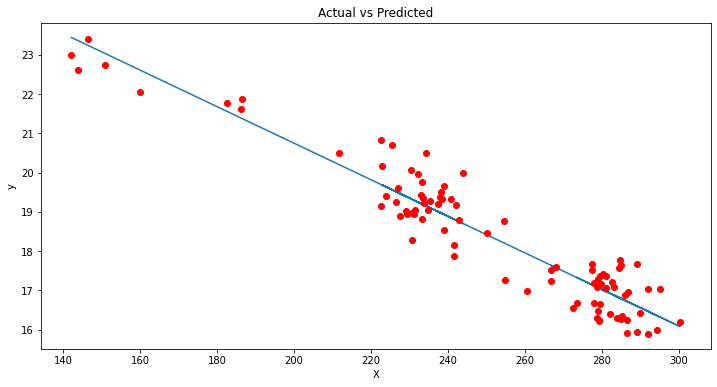

In [13]:
# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(x1, ypred)     # regression line
plt.plot(x1, y, 'ro')   # scatter plot showing actual data
plt.title('Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')

plt.show()

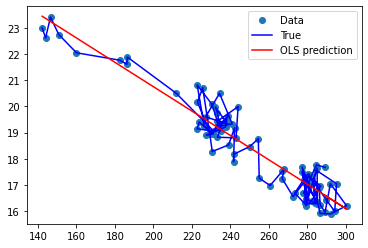

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, 'o', label="Data")
ax.plot(x1, y_true, 'b-', label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), 'r', label="OLS prediction")
ax.legend(loc="best");

In [15]:
print(item_model.summary())

                            OLS Regression Results                            
Dep. Variable:          item.Quantity   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     811.2
Date:                Mon, 05 Apr 2021   Prob (F-statistic):           1.69e-46
Time:                        08:55:59   Log-Likelihood:                -77.493
No. Observations:                  91   AIC:                             159.0
Df Residuals:                      89   BIC:                             164.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.0515      0.413     72.701      0.0

The small P values indicate that we can reject the null hypothesis that Price has no effect on Quantity.

Hight r squared indicates that our model explains a lot of the response variability.

In regression analysis, we'd like our regression model to have significant variables and to produce a high R-squared value.

We will show graphs to help interpret regression analysis results more intuitively.

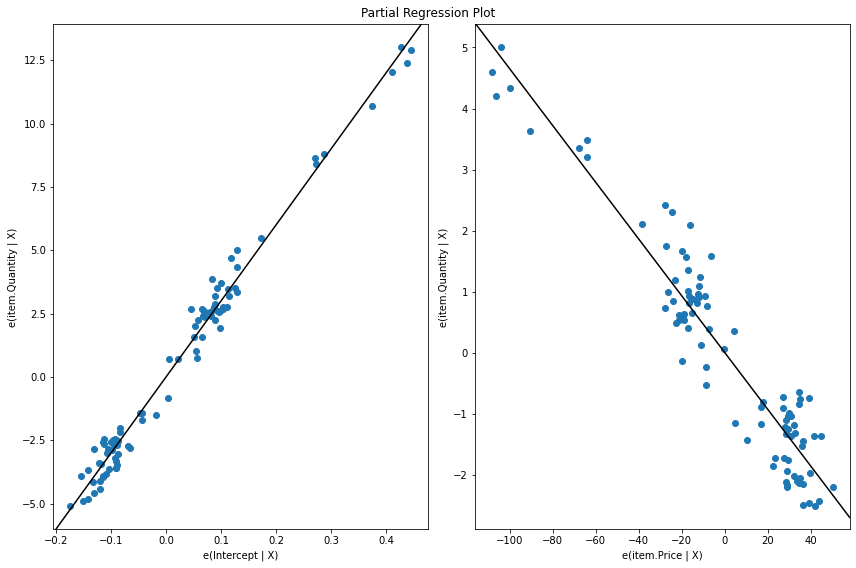

In [ ]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(item_model, fig=fig)

The trend indicates that the predictor variables (Price) provides information about the response (Quantity), and data points do not fall further from the regression line, and the predictions are very precise given a prediction interval that extends from about 29 to 31.

### Component-Component plus Residual (CCPR) Plots

The CCPR plot provides a way to judge the effect of one regressor on the response variable by taking into account the effects of the other independent variables.

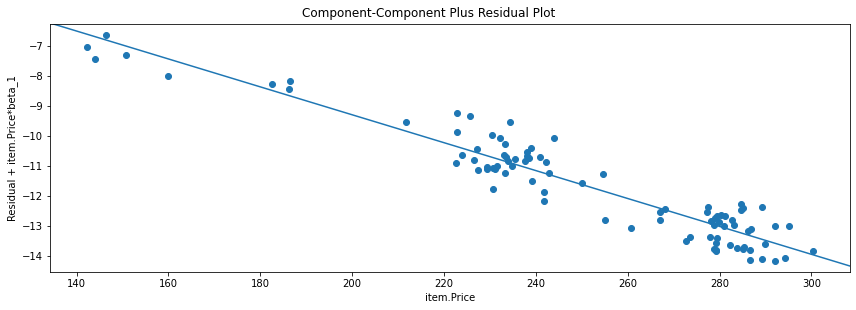

In [ ]:
fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_ccpr_grid(item_model, fig=fig)

### Regression plots

We use plot_regress_exog function to quickly check model assumptions with respect to a single regressor, Price in our case.

In [ ]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(item_model, 'Price', fig=fig)

ValueError: 'Price' is not in list

<Figure size 864x576 with 0 Axes>

### Recursive Least Square (RLS)

Finally we apply Recursive Least Square (RLS) filter to investigate parameter instability.

In [ ]:
item['Year'] = pd.to_datetime(item['Year'], format="%Y")

In [ ]:
item.head()

In [ ]:
from pandas.tseries.offsets import *
beef['Date'] = beef.apply(lambda x:(x['Year'] + BQuarterBegin(x['Quarter'])), axis=1)

In [ ]:
beef.drop(['Year', 'Quarter'], axis=1, inplace=True)

In [ ]:
beef.set_index('Date', inplace=True)

In [ ]:
beef.head(10)

In [ ]:
endog = beef['Quantity']

# To the regressors in the dataset, we add a column of ones for an intercept
exog = sm.add_constant(beef['Price'])

### RLS estimation

In [ ]:
mod = sm.RecursiveLS(endog, exog)
res = mod.fit()

print(res.summary())

The RLS model computes the regression parameters recursively, so there are as many estimates as there are datapoints, the summary table only presents the regression parameters estimated on the entire sample; these estimates are equivalent to OLS estimates.

### RLS plots

We can generate the recursively estimated coefficients plot on a given variable.

In [ ]:
res.plot_recursive_coefficient(range(mod.k_exog), alpha=None, figsize=(10,6));

For convenience, we visually check for parameter stability using the plot_cusum function.

In [ ]:
fig = res.plot_cusum(figsize=(10,6));

In the plot above, the CUSUM statistic does not move outside of the 5% significance bands, so we fail to reject the null hypothesis of stable parameters at the 5% level.